In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt , seaborn as sns

In [54]:
#Reading and all the CSV files
appl_d = pd.read_csv('/Users/abdulqadir/Learning_PG_DS/application_data.csv', encoding="ISO-8859-1")

In [4]:

appl_d.head()
appl_d.shape #Application data has 307511 rows and 122 columns
appl_d.dtypes 
appl_d.describe()
appl_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### percentage of missing values in application data.

In [201]:
missing_values = round(100*(appl_d.isnull().sum()/len(appl_d)),2)
appl_d.drop(missing_values[missing_values>0.50].index, axis=1, inplace = True) 

In [6]:
appl_d.shape

(307511, 65)

#### Tables which has missing values less than or equal to 13%

In [200]:
missing_values = round(100*(appl_d.isnull().sum()/len(appl_d)),2)
x = (missing_values[missing_values <= 0.13].index)
x = (missing_values[missing_values > 0].index)
x

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGA

## Preferred values for Imputing in missing rows for each column:

In [8]:
Columns_miss_13 = ['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2']

In [9]:
appl_d.AMT_GOODS_PRICE.mean()
appl_d.AMT_GOODS_PRICE.median()

450000.0

In [10]:
appl_d.NAME_TYPE_SUITE.value_counts(normalize = True)
NAME_TYPE_SUITE_mode = appl_d.NAME_TYPE_SUITE.mode()[0]
NAME_TYPE_SUITE_mode

'Unaccompanied'

In [11]:
appl_d.EXT_SOURCE_2.mean()
appl_d.EXT_SOURCE_2.median()

0.5659614260608526

In [12]:
#appl_d.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize= True)
#appl_d.OBS_30_CNT_SOCIAL_CIRCLE.mean()
appl_d.OBS_30_CNT_SOCIAL_CIRCLE.median()
appl_d.OBS_30_CNT_SOCIAL_CIRCLE.mode()

0    0.0
dtype: float64

In [13]:
appl_d.DEF_30_CNT_SOCIAL_CIRCLE.value_counts(normalize= True)
appl_d.DEF_30_CNT_SOCIAL_CIRCLE.mean()
appl_d.DEF_30_CNT_SOCIAL_CIRCLE.median()
appl_d.DEF_30_CNT_SOCIAL_CIRCLE.mode()

0    0.0
dtype: float64

1. For 'AMT_GOODS_PRICE' column, we see that the mean is 538396.21 and median is 450000. So, it would be better to impute the missing values with the median(i.e 450000) as the mean value seems to be quiet higher.
2. For 'NAME_TYPE_SUITE' column, we see that it's a categorical data. So, for a categorical data it would be better to replace the missing values with the mode. which is NAME_TYPE_SUITE could be fill in by 'Unaccompanied'.
3. For 'EXT_SOURCE_2' column the mean is 0.514 and median is 0.565 which is quiet close to each other. However, it is always a good practise to impute the missing values with the median , as the mean might get affected if a new value is added in the column.
4. For 'OBS_30_CNT_SOCIAL_CIRCLE' column, wee that the mean is 1.422 and median as well as the mode turns out to be 0.0. So, here again its a better option to impute the missing values with median.
5. For 'DEF_30_CNT_SOCIAL_CIRCLE' column, we observed that mean is 0.143 and median and mode is 0.0. So, we can conclude that the missing values in this column can be imputed by the median.

## Checking the datatype of the columns and making the necessary changes to it.

In [14]:
appl_d.dtypes

SK_ID_CURR             int64
TARGET                 int64
NAME_CONTRACT_TYPE    object
CODE_GENDER           object
FLAG_OWN_CAR          object
                       ...  
FLAG_DOCUMENT_17       int64
FLAG_DOCUMENT_18       int64
FLAG_DOCUMENT_19       int64
FLAG_DOCUMENT_20       int64
FLAG_DOCUMENT_21       int64
Length: 65, dtype: object

#### converting the datatype to object, for the columns which has value count less than 5

In [116]:
# no of unique values in a column
#unique_value = appl_d.nunique()
lst_total = list(appl_d.columns.values)
lst_filtered = [ i for i in lst_total if int(appl_d[i].nunique()) < 6]
lst_filtered
appl_d[lst_filtered] = appl_d[lst_filtered].loc[:, lst_filtered].astype(object)
appl_d.dtypes
#appl_d[lst_filtered] = appl_d[lst_filtered].astype(object)
#appl_d.dtypes

SK_ID_CURR                int64
TARGET                   object
NAME_CONTRACT_TYPE       object
CODE_GENDER              object
FLAG_OWN_CAR             object
                          ...  
FLAG_DOCUMENT_19         object
FLAG_DOCUMENT_20         object
FLAG_DOCUMENT_21         object
AMT_CREDIT_group         object
AMT_GOODS_PRICE_group    object
Length: 67, dtype: object

##### Checking the columns which are marked as integer data type and converting there values to absolute wherever required:

In [117]:
lst_int_dtype = [ i for i in lst_total if str(appl_d[i].dtypes) == 'int64']
lst_int_dtype

['SK_ID_CURR',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START']

In [118]:
#appl_d.DAYS_BIRTH.value_counts(normalize = True)
appl_d.DAYS_BIRTH = appl_d.DAYS_BIRTH.abs()
appl_d.DAYS_EMPLOYED = appl_d.DAYS_EMPLOYED.abs()
appl_d.DAYS_ID_PUBLISH = appl_d.DAYS_ID_PUBLISH.abs()

##### Checking the columns which are float data type and converting there values to absolute wherever required:

In [119]:
lst_float_dtype = [ i for i in lst_total if str(appl_d[i].dtypes) == 'float64']
lst_float_dtype


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

##### Variables which are marked as float but are integers, converting the data type to int

In [120]:
#appl_d.DAYS_REGISTRATION.value_counts(normalize = True)
appl_d.DAYS_REGISTRATION = appl_d.DAYS_REGISTRATION.astype(int)
appl_d.DAYS_REGISTRATION.dtypes

dtype('int64')

In [121]:
#appl_d.CNT_FAM_MEMBERS.isnull().sum()
FAM_MEMBERS_MODE = appl_d.CNT_FAM_MEMBERS.mode()[0]
appl_d.CNT_FAM_MEMBERS.fillna(FAM_MEMBERS_MODE, inplace= True)
appl_d.CNT_FAM_MEMBERS = appl_d.CNT_FAM_MEMBERS.astype(int)

In [122]:
appl_d.DAYS_REGISTRATION = appl_d.DAYS_REGISTRATION.abs()
appl_d.DAYS_LAST_PHONE_CHANGE = appl_d.DAYS_LAST_PHONE_CHANGE.abs()

## Univariate analysis for numerical data with respect to target variable.

##### A. CNT_CHILDREN with respect to Target variable.

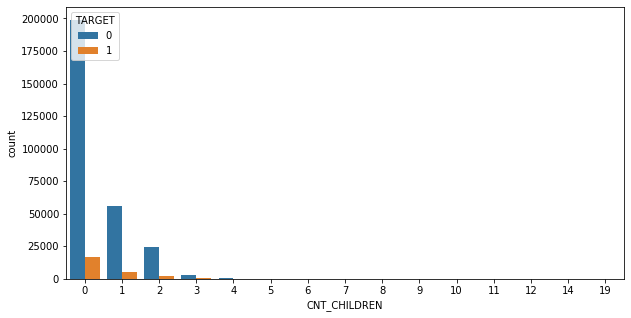

In [123]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'CNT_CHILDREN' , hue = 'TARGET', data = appl_d)
#appl_d.groupby('CNT_CHILDREN')['TARGET'].plot.bar()
#plt.show()

##### B. AMT_INCOME_TOTAL with respect to Target variable.

In [124]:
#Observation_columns =  ['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']
appl_d.groupby('TARGET')['AMT_INCOME_TOTAL'].mean()
appl_d.groupby('TARGET')['AMT_INCOME_TOTAL'].median()

TARGET
0    148500.0
1    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

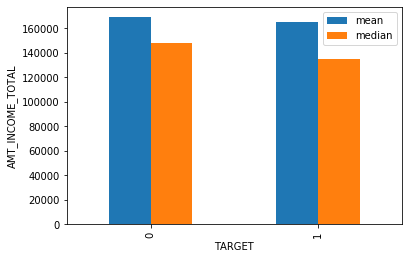

In [125]:
appl_d.groupby('TARGET')['AMT_INCOME_TOTAL'].aggregate(['mean', 'median']).plot.bar()
plt.xlabel('TARGET')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

##### C. AMT_GOODS_PRICE with respect to Target variable.

<Figure size 360x360 with 0 Axes>

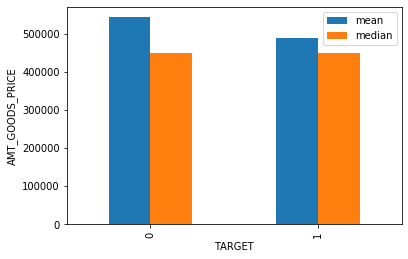

In [126]:
plt.figure(figsize = (5,5))
#appl_d.groupby('TARGET')['AMT_GOODS_PRICE'].mean()
#sns.boxplot(data= appl_d, x= 'TARGET', y = 'AMT_GOODS_PRICE')
#plt.show()
appl_d.groupby('TARGET')['AMT_GOODS_PRICE'].aggregate(['mean', 'median']).plot.bar()
plt.xlabel('TARGET')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

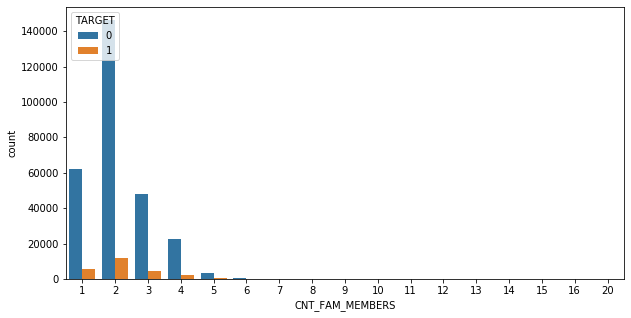

In [127]:
#appl_d.CNT_FAM_MEMBERS.value_counts(normalize = True)
plt.figure(figsize = (10,5))
sns.countplot(x = 'CNT_FAM_MEMBERS' , hue = 'TARGET', data = appl_d)
plt.show()

In [128]:
appl_d.groupby('TARGET')['DAYS_ID_PUBLISH'].mean()
appl_d.groupby('TARGET')['DAYS_ID_PUBLISH'].median()

TARGET
0    3295
1    2797
Name: DAYS_ID_PUBLISH, dtype: int64

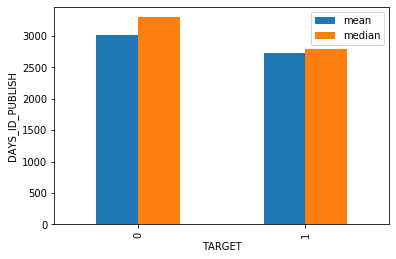

In [129]:
appl_d.groupby('TARGET')['DAYS_ID_PUBLISH'].aggregate(['mean', 'median']).plot.bar()
plt.xlabel('TARGET')
plt.ylabel('DAYS_ID_PUBLISH')
plt.show()

1. The 'CNT_CHILDREN' column i.e the no of childrens the client has, we observe that clients with more no of childrens are the once are paying their loans on time.
2. The 'AMT_INCOME_TOTAL' i.e the income of the client and plotting a bar graph, we see that the clients with higher salary tends to be a outlier while paying their loans.
3. The 'AMT_GOODS_PRICE' column i.e the price of the goods for which the load is provided, we can observe that the loan taken for goods with lower price turns to be a defaulter.
4. The 'CNT_FAM_MEMBERS' column i.e the no of family members the client has, we observe that the customer who has only two family members are the most reliable and have been paying the loan on time.
5. The 'DAYS_ID_PUBLISH' column i.e days before the application did client change the identity document with which he applied for the loan , we can say that the client who have chaged their identity document approximately 2700 days before might be an outlier.

### Binning Columns for easier analysis

A. Binning AMT_CREDIT column

In [55]:
#appl_d.AMT_CREDIT.min()
appl_d['AMT_CREDIT_group'] = pd.cut(appl_d.AMT_CREDIT, [0,500000,1500000,2500000,4500000,], labels = ["0-500000", "500000-1500000", "1500000-2500000", "2500000 - 4500000"])
appl_d.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,500000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,500000-1500000


##### AMT_CREDIT_group with TARGET

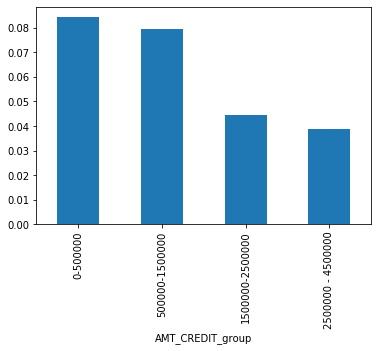

In [56]:
appl_d.groupby(['AMT_CREDIT_group'])['TARGET'].mean().plot.bar()
plt.show()

#### From the above bar plot we, can draw a conclusion that clients with salary between 0-500000 and 500000- 1500000 are more likely to be a defaulter 

B. Binning AMT_INCOME_TOTAL column

In [57]:
#appl_d.AMT_INCOME_TOTAL.max()
#25650.0
appl_d['AMT_INCOME_TOTAL_group'] = pd.cut(appl_d.AMT_INCOME_TOTAL, [0, 20000000, 40000000, 60000000, 80000000, 100000000, 120000000], labels = ["0-20000000", "20000000-40000000", "40000000-60000000", "60000000 - 80000000", "80000000-100000000", "100000000-120000000"])
appl_d.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_group,AMT_INCOME_TOTAL_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0-500000,0-20000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,500000-1500000,0-20000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,0-20000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0-500000,0-20000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,500000-1500000,0-20000000


##### AMT_INCOME_TOTAL_group with TARGET

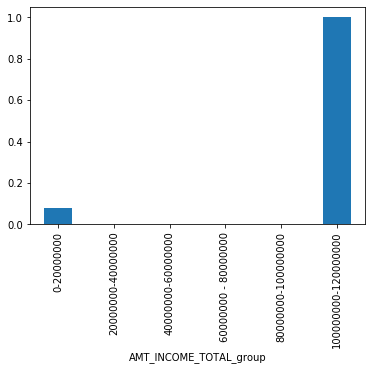

In [58]:
appl_d.groupby(['AMT_INCOME_TOTAL_group'])['TARGET'].mean().plot.bar()
plt.show()

#### From the above bar plot we can conclude that the clients with highest salary are more likely to be a defaulter.

C. Binning AMT_GOODS_PRICE column

In [131]:
appl_d.AMT_GOODS_PRICE.min()
#4050000.0
appl_d['AMT_GOODS_PRICE_group'] = pd.cut(appl_d.AMT_GOODS_PRICE, [0,200000,1500000,2500000,4050000,], labels = ["0-200000", "500000-1500000", "1500000-2500000", "2500000 - 4500000"])
appl_d.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_CREDIT_group,AMT_GOODS_PRICE_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0-500000,500000-1500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,500000-1500000,500000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0-500000,0-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0-500000,500000-1500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,500000-1500000,500000-1500000


### Imbalance percentage of the TARGET column

In [132]:
(appl_d.loc[appl_d.TARGET == 0, 'TARGET'].count())/(len(appl_d.TARGET))
(appl_d.loc[appl_d.TARGET == 1, 'TARGET'].count())/(len(appl_d.TARGET))

dict(appl_d.TARGET.value_counts(normalize = True))


{0: 0.9192711805431351, 1: 0.08072881945686496}

Percentage of clients those with payment difficulties is 8.07% and rest who have payed the loans are 91.93%

### Creating two new dataframes on basis of TARGET value zero and one.

##### Dataframe where TARGET = '0'

In [133]:
appl_d_zero = appl_d.loc[appl_d.TARGET == 0]
appl_d_zero.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_CREDIT_group,AMT_GOODS_PRICE_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0-500000,500000-1500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,1,0,0,0,0,0,500000-1500000,500000-1500000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0,0,0,0,500000-1500000,500000-1500000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0,0,0,0,0-500000,500000-1500000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0,0,0,0,0-500000,500000-1500000


##### Dataframe where TARGET = '1'

In [63]:
appl_d_one = appl_d.loc[appl_d.TARGET == 1]
appl_d_one.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_group,AMT_INCOME_TOTAL_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0-500000,0-20000000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0.0,0.0,0.0,0.0,2.0,2.0,500000-1500000,0-20000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0.0,0.0,0.0,2.0,0.0,4.0,500000-1500000,0-20000000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0-500000,0-20000000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,0-20000000


## Univariate Analysis of categorial data with respect to TARGET varible

A. NAME_CONTRACT_TYPE with respect TARGET 

In [134]:
categorical_observation_table = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_FAMILY_STATUS']

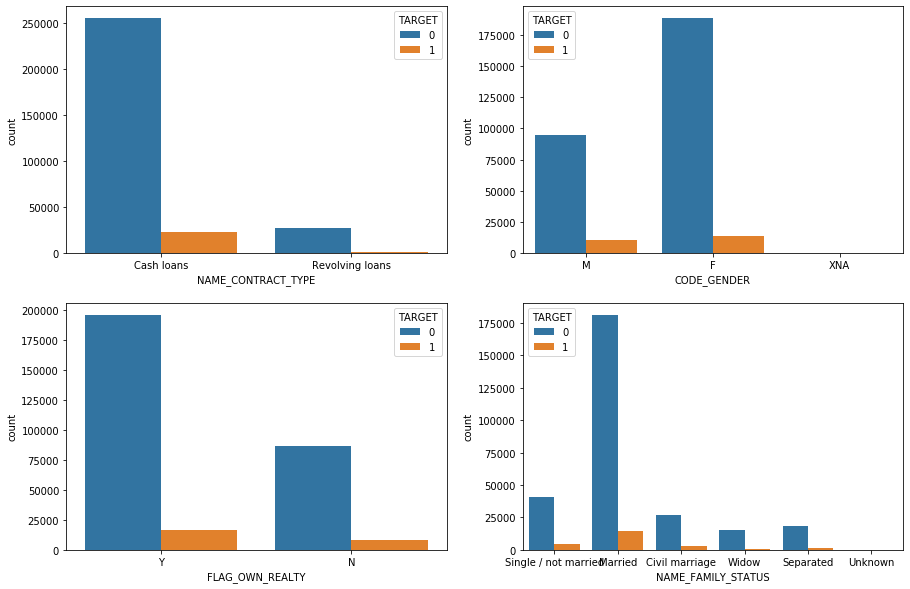

In [139]:
plt.figure(figsize = (15, 10))
for i in enumerate(categorical_observation_table):
    plt.subplot(len(categorical_observation_table)/2, 2, i[0]+1)
    sns.countplot(x = i[1] , hue = 'TARGET', data = appl_d)

1. From the first plot, 'NAME_CONTRACT_TYPE' with respect to TARGET variable , we observe that in comparison to who opted for Revolving loans, the clients who failed to pay their loans opted for cash loans.
2. From the second plot 'CODE_GENDER' with respect to TARGET, we observe that there is slight high number of female clients who turned out to outliers in comparison to Male clients.
3. From the third plot, 'FLAG_OWN_REALTY' with respect to TARGET variable, we observe that the clients who own a flat or house turns out to be a defaulter in comparison to the clients who doesn't.
4. From the third plot, 'NAME_FAMILY_STATUS' with respect to TARGET variable, we observe that the married clients are the ones who have paid their loans on time. However, among the clients who has difficulty in paying their loans are also married.

## Correlation between numeric columns with respect to TARGET variable

#### Checking the correlation of the columns with each other with both the Target files (0,1) individually

##### A.  Top 10 Correlated columns for Target = 'O' from appl_d_zero dataframe:

In [164]:
corr = appl_d_one.corr()
corr_new = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))#k =1 diagonal and below diagonal values are masked.
corr_new = corr_new.unstack().reset_index()
corr_new.columns = ['var1', 'var2', 'correlation']
corr_new.dropna(subset = ['correlation'], inplace = True)
corr_new['correlation'] = round(corr_new['correlation'], 2)
corr_new['correlation'] = abs(corr_new['correlation'])
corr_new.sort_values(by = 'correlation', ascending = False).head(10)

,var1,var2,correlation
318,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
98,AMT_GOODS_PRICE,AMT_CREDIT,0.98
210,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
338,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
99,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
79,AMT_ANNUITY,AMT_CREDIT,0.75
159,DAYS_EMPLOYED,DAYS_BIRTH,0.58
319,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.34
299,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.33
178,DAYS_REGISTRATION,DAYS_BIRTH,0.29


##### A.  Top 10 Correlated columns for Target = '1' from appl_d_one dataframe:

In [166]:
corr2 = appl_d_zero.corr()
corr_new2 = corr2.where(np.triu(np.ones(corr2.shape), k=1).astype(np.bool))
corr_new2 = corr_new2.unstack().reset_index()
corr_new2.columns = ['var1', 'var2', 'correlation']
corr_new2.dropna(subset = ['correlation'], inplace = True)
corr_new2['correlation'] = round(corr_new2['correlation'], 2)
corr_new2['correlation'] = abs(corr_new2['correlation'])
corr_new2.sort_values(by = 'correlation', ascending = False).head(10)

,var1,var2,correlation
318,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
98,AMT_GOODS_PRICE,AMT_CREDIT,0.99
210,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
338,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
99,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
79,AMT_ANNUITY,AMT_CREDIT,0.77
159,DAYS_EMPLOYED,DAYS_BIRTH,0.63
78,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
97,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
134,DAYS_BIRTH,CNT_CHILDREN,0.34


### Observation from the above correlation table for both the files:

1. The maximum correlated variable for the appl_d_zero(i.e for the clients who are defaulters) are the OBS_60_CNT_SOCIAL_CIRCLE with OBS_30_CNT_SOCIAL_CIRCLE with the correlation coeffiecient of 1.00
2. We can say that both the variables are linearly related to each other.When one variable moves higher or lower, the other variable moves in the same direction with the same magnitude.
3. Similary, the maximum correlated variable for the appl_d_one(i.e for the clients who are defaulters) is also OBS_60_CNT_SOCIAL_CIRCLE with OBS_30_CNT_SOCIAL_CIRCLE with the correlation coeffiecient of 1.00
4. Further, on observation we see that the correlation coefficient of AMT_GOODS_PRICE with AMT_CREDIT, CNT_FAM_MEMBERS with CNT_CHILDREN , DEF_60_CNT_SOCIAL_CIRCLE with DEF_30_CNT_SOCIAL_CIRCLE are almost similar for both the TARGETS 0 and 1.
5. For the defaulter clients the correlation coefficient of AMT_GOODS_PRICE with AMT_CREDIT and CNT_FAM_MEMBERS with CNT_CHILDREN are quiet high. So, while taking decisions we may look into these factors.

## Bivariate Analysis for numeric variables with respect to TARGET variable

### Bivariate Analysis for numeric variable

###### AMT_INCOME_TOTAL vs AMT_CREDIT

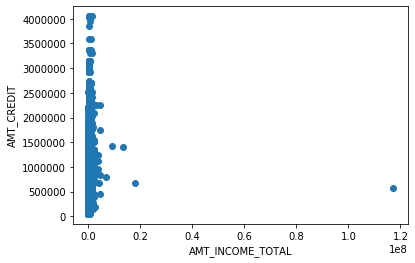

In [176]:
plt.scatter(appl_d.AMT_INCOME_TOTAL , appl_d.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.show()

1. From the above scatter plot we can say that the clients with less salary tends to opt for loans.
2. One outlier , where the client has the higher salary but and gas opted for loan.
3. We can't actually draw any conclusion from the above graph, as it obvious that the clients having less salary tends to apply for loan more.

###### CNT_CHILDREN vs CNT_FAM_MEMBERS vs AMT_CREDIT

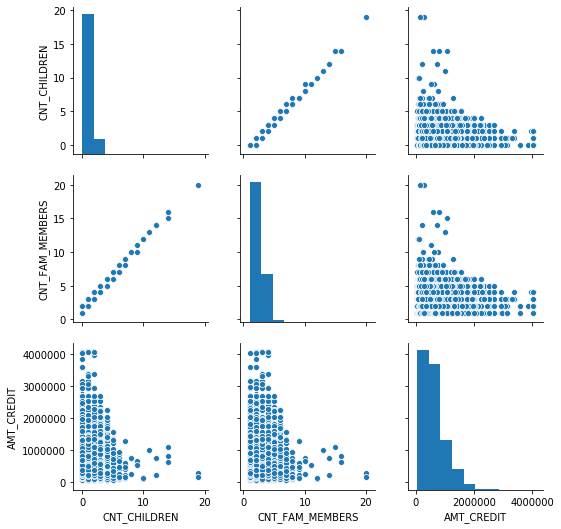

In [180]:
sns.pairplot(data = appl_d, vars=["CNT_CHILDREN", "CNT_FAM_MEMBERS", "AMT_CREDIT"])
plt.show()

From the above pairplot between CNT_CHILDREN, CNT_FAM_MEMBERS and AMT_CREDIT:
1. From the above pairplot we see that there is no such relation could be formed between these variables.
2. Only, the CNT_CHILDREN and CNT_FAM_MEMBERS are linearly related which is definitely obvious that their will be an increase in family members with the increase of children of the client.

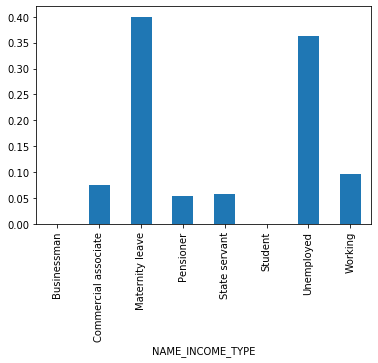

In [14]:
#appl_d.NAME_INCOME_TYPE.value_counts()
#appl_d["TARGET"] = appl_d["TARGET"].astype(int)
#appl_d.dtypes

appl_d.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

From the above bar plot of NAME_INCOME_TYPE with respect to TARGET variable, we see that the unemployed clients and the clients those are on maternity leave were able to pay their loans on Time in comparison to the clients those are working.

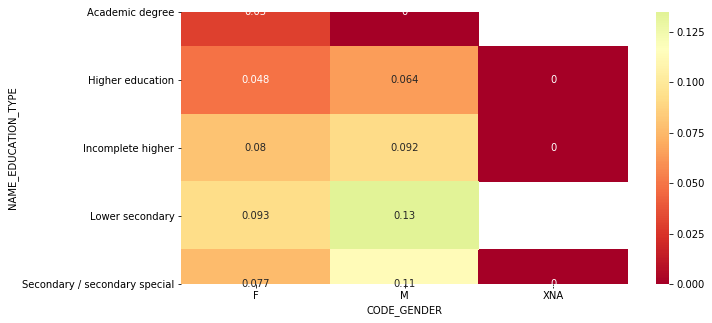

In [61]:
plt.figure(figsize = (10,5))
res1 = pd.pivot_table(data = appl_d, index = 'NAME_EDUCATION_TYPE', columns = 'CODE_GENDER', values = 'TARGET')
sns.heatmap(res1, annot = True, cmap = "RdYlGn", center = 0.117)
plt.show()

From the above heat map, we don't see any stron correlation between two factors.

However, we might say that the Male clients with lower Secondary and Secondary Eductaion qualification might turn out to be a defaulter. As it has the maximum coefficient relation.

### Reading Previous_Application data

In [6]:
prev1 = pd.read_csv('/Users/abdulqadir/Learning_PG_DS/previous_application.csv', encoding="ISO-8859-1")

In [58]:
#prev1.head()
prev1.shape
#prev1.dtypes
#prev1.describe()
#prev1.info()

(1670214, 37)

In [59]:
missing_values2 = round(100*(prev1.isnull().sum()/len(prev1)),2)
prev1.drop(missing_values2[missing_values2>0.50].index, axis=1, inplace = True)
prev1.shape

(1670214, 23)

## Merging Application_data and Previous_application

In [7]:
merged_df = pd.concat([prev1, appl_d])
merged_df.dtypes
#merged_df.NAME_CONTRACT_TYPE.value_counts(normalize = True)

AMT_ANNUITY                     float64
AMT_APPLICATION                 float64
AMT_CREDIT                      float64
AMT_DOWN_PAYMENT                float64
AMT_GOODS_PRICE                 float64
                                 ...   
YEARS_BEGINEXPLUATATION_MEDI    float64
YEARS_BEGINEXPLUATATION_MODE    float64
YEARS_BUILD_AVG                 float64
YEARS_BUILD_MEDI                float64
YEARS_BUILD_MODE                float64
Length: 151, dtype: object

In [40]:
#TARGET = appl_d.TARGET.mode()[0]
#merged_df.TARGET.fillna(TARGET, inplace= True)
#merged_df.TARGET = merged_df.TARGET.astype(int)

merged_df.AMT_APPLICATION.median()
#merged_df["TARGET"] = merged_df[-merged_df["TARGET"].isnull()].astype(int)
#merged_df.dtypes

71046.0

## Univariate Analysis for merged_df.

### Univariate Analysis for numeric variable for merged_df.

##### AMT_ANNUITY with TARGET

In [8]:
merged_df.groupby('TARGET')['AMT_ANNUITY'].mean()
#merged_df.groupby('TARGET')['AMT_ANNUITY'].median()

TARGET
0.0    27163.623349
1.0    26481.744290
Name: AMT_ANNUITY, dtype: float64

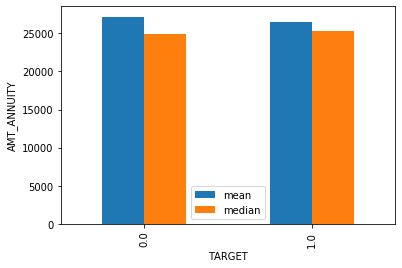

In [9]:
merged_df.groupby('TARGET')['AMT_ANNUITY'].aggregate(['mean', 'median']).plot.bar()
plt.xlabel('TARGET')
plt.ylabel('AMT_ANNUITY')
plt.show()

##### AMT_CREDIT with TARGET

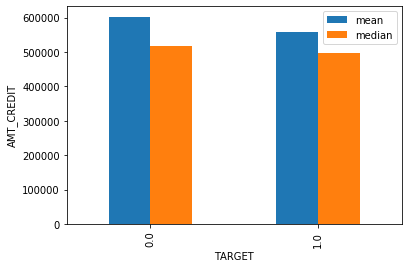

In [10]:
merged_df.groupby('TARGET')['AMT_CREDIT'].aggregate(['mean', 'median']).plot.bar()
plt.xlabel('TARGET')
plt.ylabel('AMT_CREDIT')
plt.show()

From the above plots:

A. AMT_ANNUITY with respect to TARGET variable, we don't see a lot difference in the outliers and the clients who have paid their loan on time. So, AMT_ANNUITY cannot be a factor to determine the outliers.

B. AMT_CREDIT with respect to TARGET, we see that their is a very slight difference in mean and median of the clients those who weren't able to pay their loans. The clients who have less credit amounts are the loan defaulters.

### Univariate Analysis for categorical variable for merged_df.

In [48]:
lst_total_1 = list(merged_df.columns.values)
lst_dtype = [ i for i in lst_total_1 if str(merged_df[i].dtypes) == 'object']
lst_dtype

['CHANNEL_TYPE',
 'CODE_GENDER',
 'CODE_REJECT_REASON',
 'EMERGENCYSTATE_MODE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CLIENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_GOODS_CATEGORY',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_PAYMENT_TYPE',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_TYPE_SUITE',
 'NAME_YIELD_GROUP',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'PRODUCT_COMBINATION',
 'WALLSMATERIAL_MODE',
 'WEEKDAY_APPR_PROCESS_START']

In [35]:
categorical_observation = ['CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']

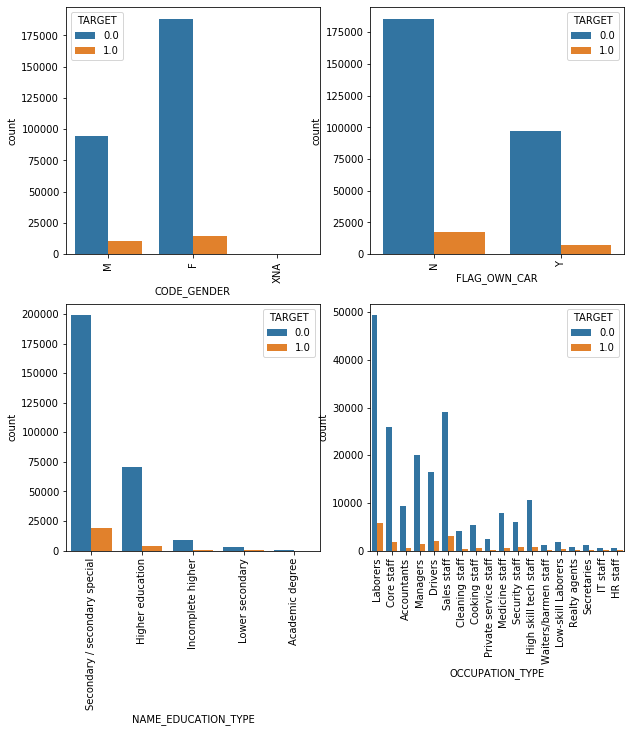

In [38]:
plt.figure(figsize = (10, 10))
for j in enumerate(categorical_observation):
    plt.subplot(len(categorical_observation)/2, 2, j[0]+1)
    sns.countplot(x = j[1] , hue = 'TARGET', data = merged_df)
    plt.xticks(rotation = 90)

From the above univariate Analysis of categorical data:

 A.  Plot 1, CODE_GENDER with respect to TARGET, we observe that in compare to male , female clients were able to pay their loans on time. However, for the defaulter clients the number of male and female employees are almost similar.
 
 B. Plot 2, FLAG_OWN_CAR with respect to TARGET, we observe that clients who own car are more likely to be a defaulter in comparison with the clients who doesn't own a car.
 
 C. Plot 3, NEW_EDUCATION_TYPE with respect to TARGET, we observe that the clients those have secondary education turns out to be defaulter in comparison to the clients with other eduation degrees.plot
 
 D. Plot 4, OCCUPATION TYPE with respect to TARGET, we observe that the clients who has occupation as labourers and Sales staffs are the once who turn out to the defaulters. 

## Bivariate Analysis of the merged_df.

### Bivariate Analysis of numerical variable from merged_df

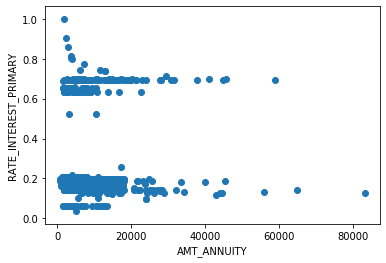

In [47]:
plt.scatter(merged_df.AMT_ANNUITY , merged_df.RATE_INTEREST_PRIMARY)
plt.xlabel('AMT_ANNUITY')
plt.ylabel('RATE_INTEREST_PRIMARY')
plt.show()

From the above scattered plot AMT_ANNUITY vs RATE_INTEREST_PRIMARY:
    
   . We observe that their is no strong relation between the two variable.
   
   . The Interest rate normalized on previous credit remain constant for the Annuity of 0 to aproximately 25000.
   
   . We can see few outliers in the region of Amount Annuity ranging, 40000 to 60000.

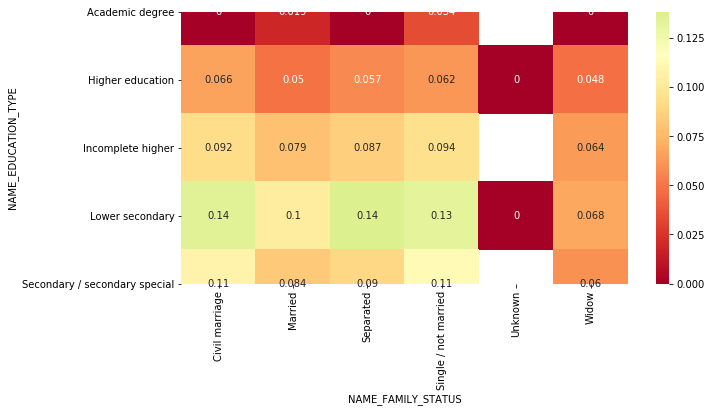

In [62]:
plt.figure(figsize = (10,5))
res1 = pd.pivot_table(data = merged_df, index = 'NAME_EDUCATION_TYPE', columns = 'NAME_FAMILY_STATUS', values = 'TARGET')
sns.heatmap(res1, annot = True, cmap = "RdYlGn", center = 0.117)
plt.show()

From the above heatmap we were unable to draw any strong correlation between any two factors.

. However, there are slight chances that the clients who are in the category of civil marriage and single with secondary or lower secondary Education might be a defaulter. As the maximum correlation coeffincient drawn here are between these factors.


. Also, the client who are widow and have completed higher education are most likely to pay their loans on time, with the minimum correlation coefiicient of 0.048

## CONCLUSION from the above Analysis of Application_Data and Previous_Application_Data

1. From the Application_ Data univariate Analysis with respect to TARGET variable the factors that should matter while providing a loan to the customers are:

  a) AMT_INCOME_TOTAL i.e the income of the clients.
  
  b) CNT_FAM_MEMBERS, family members of the clients, more the no of family members more the chances of client          being a defaulter.
  
  c) AMT_GOODS_PRICE , loan taken for goods that has lower price.
  
2. From the Application_ Data, Bivariate Analysis with respect to TARGET variable the factors that should matter while providing a loan to the customers are:

   a) NAME_CONTRACT_TYPE i.e, the type of loan given to the clients, it was observed that clients who were             provided cash loans has more no of defaulters.
   
   b) FLAG_OWN_REALTY i.e, the clients who owns a flat or house could be a defaulter.

3. From the Previous_Application_Data, Bivariate Analysis with respect to TARGET variable the factors that should matter while providing a loan to the customers are:
   
   a) FLAG_OWN_CAR i.e, clients who owns a car has a chances of being a defaulter.
   
   b) NEW_EDUCATION_TYPE i.e, clients who have secondary education qualification also have a chance to fall into       defaulter category.
   
   c) OCCUPATION TYPE i.e, clients who work as labourers and sales staffs also might have difficulty in paying         their loans.